In [ ]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Text_Classification2.csv', encoding= 'unicode_escape')

In [ ]:
df

,Articles,Subject
0,Steve's hand was dislocated during cricket match,Health
1,He broke / fractured his leg-bone,Health
2,I feel like vomiting / I'm feeling vomiting,Health
3,I am feeling sick/ nauseating,Health
4,How is she today ?,Health
...,...,...
96,The millionaire purchases rare art from all ov...,Art
97,Do you appreciate fine art,Art
98,Let's go to the art museum,Art
99,She's an art dealer,Art


In [ ]:
df = df.dropna()

In [ ]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Subject').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Subject'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Subject'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each Subject",
)

alt.LayerChart(...)

In [ ]:
df['Articles_length'] = df['Articles'].str.len()

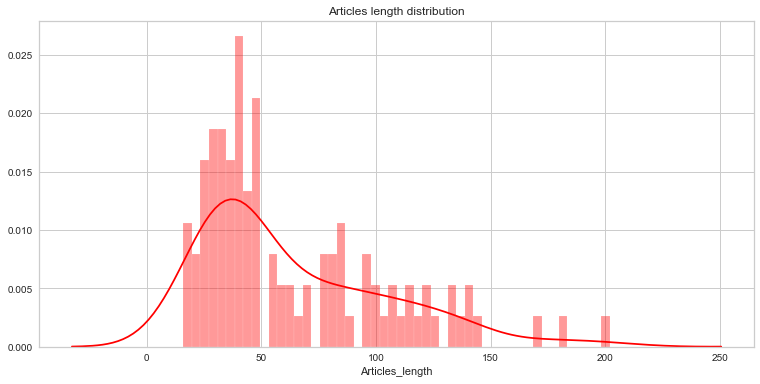

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['Articles_length'], kde=True, color="red", bins=50).set_title('Articles length distribution');

In [ ]:
quantile_95 = df['Articles_length'].quantile(0.95)
df_95 = df[df['Articles_length'] < quantile_95]

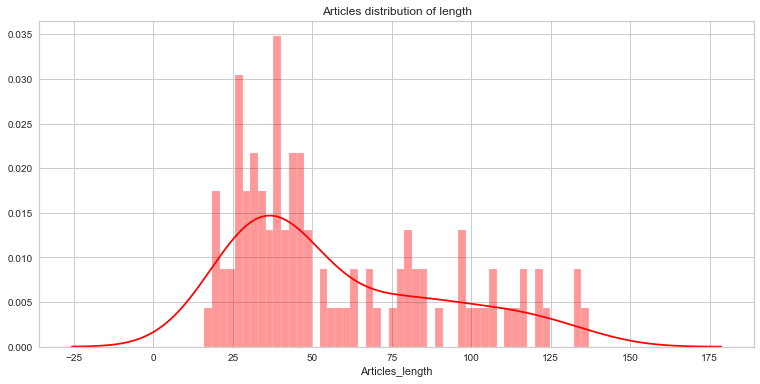

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['Articles_length'], kde=True, color="red", bins=50).set_title('Articles distribution of length');

In [ ]:
df['Articles_length'].describe()

count    101.000000
mean      64.059406
std       40.759250
min       16.000000
25%       33.000000
50%       47.000000
75%       85.000000
max      202.000000
Name: Articles_length, dtype: float64

In [ ]:
df = df.drop('Articles_length',axis=1)

In [ ]:
df = df.reset_index()

In [ ]:
df

,level_0,index,Articles,Subject,id
0,0,0,Steve's hand was dislocated during cricket match,Health,1
1,1,1,He broke / fractured his leg-bone,Health,1
2,2,2,I feel like vomiting / I'm feeling vomiting,Health,1
3,3,3,I am feeling sick/ nauseating,Health,1
4,4,4,How is she today ?,Health,1
...,...,...,...,...,...
96,96,96,The millionaire purchases rare art from all ov...,Art,1
97,97,97,Do you appreciate fine art,Art,1
98,98,98,Let's go to the art museum,Art,1
99,99,99,She's an art dealer,Art,1


In [ ]:
##############

In [ ]:
X, y = df['Articles'], df.Subject;

In [ ]:
data1 = pd

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
documents = []

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Removing special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # removing single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Removing each characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substitute many spaces into single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Remove prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Convert to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2100, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2100, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(80, 9)

In [ ]:
X_test.shape

(21, 9)

In [ ]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(n_clusters=3, random_state=42)
print("This is the K-means clustering: ", km.fit(X))
labels = km.labels_
print("These are the labels: ", labels)
centroids= km.cluster_centers_
print("These are the cluster centers from the function cluster center:\n ", centroids)

This is the K-means clustering:  KMeans(n_clusters=3, random_state=42)
These are the labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2
 1 2 2 2 2 1 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
These are the cluster centers from the function cluster center:
  [[ 9.33651239e-01 -2.77555756e-17  2.77555756e-17  4.01019585e-02
   1.38777878e-17  1.33324835e-01  2.77555756e-17  1.38777878e-17
   6.93889390e-18]
 [-1.66533454e-16  5.19945886e-03  2.29551718e-01  6.07010101e-02
   4.39118753e-02  1.76219790e-01  1.69741417e-01  4.39118753e-02
   6.40327691e-02]
 [-5.55111512e-17  9.60177751e-01  2.77555756e-17 -6.93889390e-18
   1.04083409e-17  4.01553689e-02  2.77555756e-17  1.04083409e-17
   5.01611564e-02]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predict1 = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict1)

0.7142857142857143

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(y_train, model.predict(X_train)))

The training accuracy is: 
0.7625


In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(y_test, predict1))

The test accuracy is: 
0.7142857142857143


In [ ]:
print("Classification report")
print(classification_report(y_test,predict1))

Classification report
                precision    recall  f1-score   support

           Art       1.00      1.00      1.00         4
      Business       0.33      1.00      0.50         3
   Engineering       1.00      0.80      0.89         5
        Health       1.00      0.20      0.33         5
Sports science       1.00      0.75      0.86         4

      accuracy                           0.71        21
     macro avg       0.87      0.75      0.72        21
  weighted avg       0.90      0.71      0.72        21



In [ ]:
df

,level_0,index,Articles,Subject,id
0,0,0,Steve's hand was dislocated during cricket match,Health,1
1,1,1,He broke / fractured his leg-bone,Health,1
2,2,2,I feel like vomiting / I'm feeling vomiting,Health,1
3,3,3,I am feeling sick/ nauseating,Health,1
4,4,4,How is she today ?,Health,1
...,...,...,...,...,...
96,96,96,The millionaire purchases rare art from all ov...,Art,1
97,97,97,Do you appreciate fine art,Art,1
98,98,98,Let's go to the art museum,Art,1
99,99,99,She's an art dealer,Art,1


In [ ]:
documents = pd.DataFrame(documents)
documents

,0
0,steve hand wa dislocated during cricket match
1,he broke fractured his leg bone
2,i feel like vomiting m feeling vomiting
3,i am feeling sick nauseating
4,how is she today
...,...
96,the millionaire purchase rare art from all ove...
97,do you appreciate fine art
98,let go to the art museum
99,she an art dealer


In [ ]:
documents['Subject'] = df['Subject']
documents

,0,Subject
0,steve hand wa dislocated during cricket match,Health
1,he broke fractured his leg bone,Health
2,i feel like vomiting m feeling vomiting,Health
3,i am feeling sick nauseating,Health
4,how is she today,Health
...,...,...
96,the millionaire purchase rare art from all ove...,Art
97,do you appreciate fine art,Art
98,let go to the art museum,Art
99,she an art dealer,Art


In [ ]:
from sklearn import preprocessing 

In [ ]:
labels_encoder1 = preprocessing.LabelEncoder() 

In [ ]:
#transforming objects to strings
#encoding objects by transforming strings to integers for processing
documents['Subject_coded']  = labels_encoder1.fit_transform(documents['Subject'].astype(str))


In [ ]:
documents

,0,Subject,Subject_coded
0,steve hand wa dislocated during cricket match,Health,3
1,he broke fractured his leg bone,Health,3
2,i feel like vomiting m feeling vomiting,Health,3
3,i am feeling sick nauseating,Health,3
4,how is she today,Health,3
...,...,...,...
96,the millionaire purchase rare art from all ove...,Art,0
97,do you appreciate fine art,Art,0
98,let go to the art museum,Art,0
99,she an art dealer,Art,0


In [ ]:
from sklearn.decomposition import PCA

features = np.concatenate((X_train,X_test), axis=0)
labels = np.concatenate((y_train,y_test), axis=0)

In [ ]:
print(features.shape)
print(labels.shape)

(101, 9)
(101,)


In [ ]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creating the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fitting and features transform
    principal_components = mod.fit_transform(features)
    
    # inserting into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Converting labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Getting subjects name
    Subject_names = {
        "0": 'Health',
        "1": 'Engineering',
        "2": 'Sports science',
        "3": 'Business',
        "4": 'Art'
    }

    
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':Subject_names})

    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"],
                    alpha=.7).set_title(title);


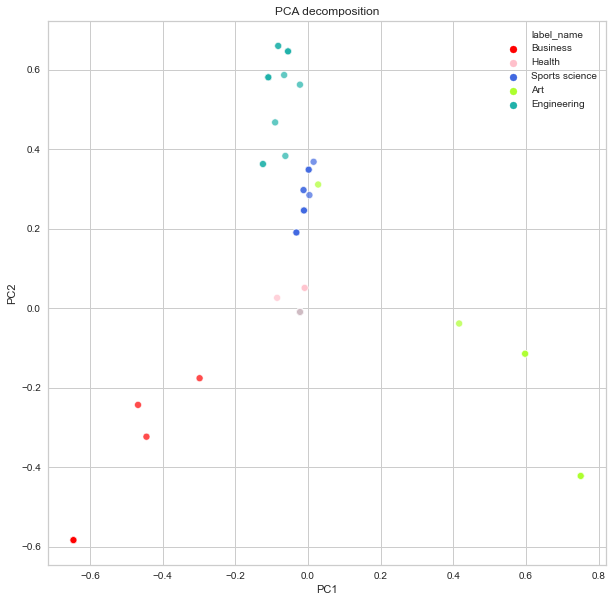

In [ ]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

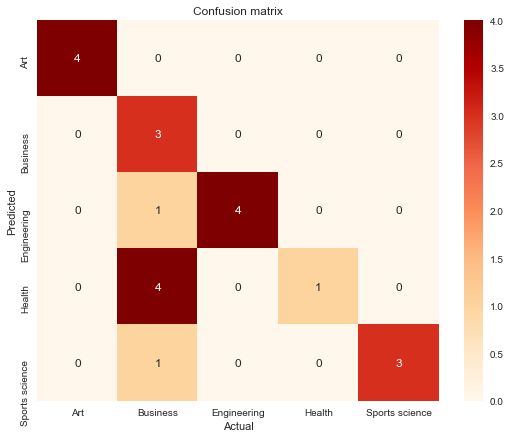

In [ ]:
con_df = documents[['Subject', 'Subject_coded']].drop_duplicates().sort_values('Subject_coded')
conf_matrix = confusion_matrix(y_test, predict1)
plt.figure(figsize=(9,7))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=con_df['Subject'].values, 
            yticklabels=con_df['Subject'].values,
            cmap="OrRd")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.autoscale()
plt.show()

In [ ]:
X_in = []
X_in =input("Search For:")
y = vectorizer.transform([X_in])
predict1 = model.predict(y)
print(predict1)

Search For:science is art
['Art']
